In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
A=np.eye(5)
A

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## 2 单变量的线性回归
整个2的部分需要根据城市人口数量，预测开小吃店的利润。 <br/>
数据在ex1data1.txt里，第一列是城市人口数量，第二列是该城市小吃店利润。

<br/>

### 2.1 Plotting the Data
读入数据，然后展示数据

In [3]:
path = 'D:/myjupyter/_Egg_WuEnda/Data/ex1data1.txt'
data = pd.read_csv(path,header=None,names=['Population','Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


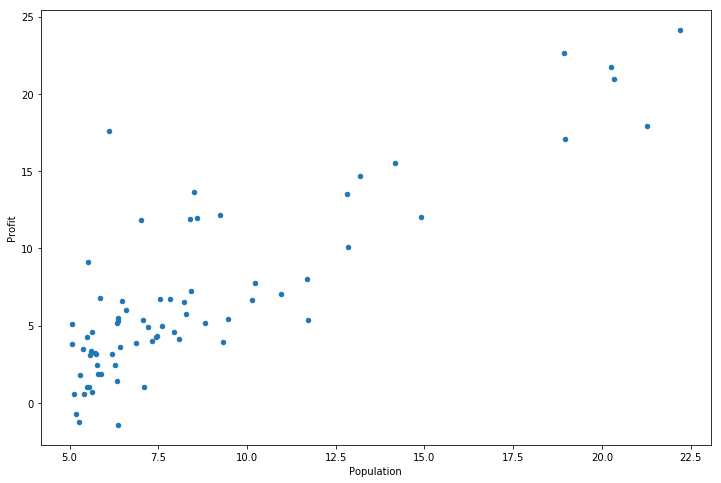

In [4]:
data.plot(kind='scatter',x='Population',y='Profit',figsize=(12,8))
plt.show()

### 2.2 梯度下降
这个部分需要在现有数据集上，训练线性回归的参数θ
#### 2.2.1 公式

In [5]:
def computeCost(X,y,theta):
    inner = np.power((X*theta.T-y),2)
    return np.sum((inner)/(2*len(X)))


In [6]:
data.insert(0,'Ones',1) #位置，名称，data

In [7]:
# initialize x and y
cols = data.shape[1] #列数;data.shape[0]为行数
X = data.iloc[:,:-1] #X是data里的除最后列
y = data.iloc[:,cols-1:cols] #y是data最后一列

In [8]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [9]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [10]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))
X.shape,theta.shape,y.shape

((72, 2), (1, 2), (72, 1))

In [11]:
computeCost(X, y, theta)

40.175290826974305

#### 2.2.4 梯度下降

In [12]:
def gradientDescent(X,y,theta,alpha,iters):
    temp = np.matrix(np.zeros(theta.shape)) # only has 1 row
    parameters = int(theta.ravel().shape[1]) # 参数数 ==2
    cost = np.zeros(iters) # iters个0的数组，后续依次计算填入
    
    for i in range(iters):
        error = (X*theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error,X[:,j])
            temp[0,j] = theta[0,j] - ((alpha/len(X)) * np.sum(term))
            
        theta = temp # iteration
        cost[i] = computeCost(X,y,theta)
        
    return theta,cost

#这个部分实现了Ѳ的更新

In [13]:
alpha = 0.01
iters = 1500

In [14]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.01902296,  1.14867812]])

In [15]:
predict1 = [1,3.5]*g.T
print("predict1:",predict1)
predict2 = [1,7]*g.T
print("predict2:",predict2)

predict1: [[1.00135045]]
predict2: [[5.02172387]]


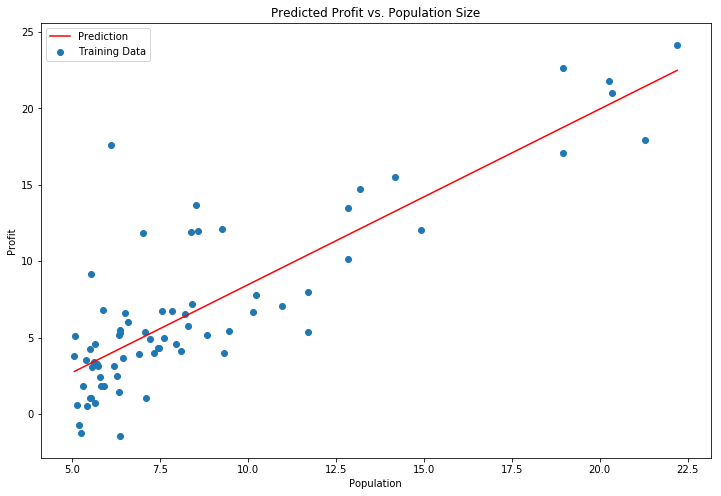

In [16]:
x = np.linspace(data.Population.min(),data.Population.max(),100)
f = g[0,0]+g[0,1]*x

fig,ax = plt.subplots(figsize=(12,8))
ax.plot(x,f,'r',label='Prediction')
ax.scatter(data.Population,data.Profit,label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()
# 原始数据和拟合的直线

## 3 多变量线性回归

In [17]:
path  = 'D:\myjupyter\_Egg_WuEnda\Data\ex1data2.txt'
data2 = pd.read_csv(path,header=None,names=['Size','Bedrooms','Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### 3.1 特征归一化

In [18]:
data2 = (data2-data2.mean())/data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


### 3.2 梯度下降

In [19]:
# 创造全0数组
def arrzeros(num):
    arr = [];
    for i in range(num):
        arr.append(0)
    return arr

arrzeros(5)

[0, 0, 0, 0, 0]

In [20]:
# add a column of constant item 
data2.insert(0,'Ones',1)

# initialize x and y
cols = data2.shape[1]
X2 = data2.iloc[:,:-1]
y2 = data2.iloc[:,cols-1:cols]

# 转换成matrix格式，初始化theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array(arrzeros(X2.shape[1])))

# 运行梯度下降算法
g2,cost2 = gradientDescent(X2,y2,theta2,alpha,iters)
g2

matrix([[-1.10856950e-16,  8.84042349e-01, -5.24551809e-02]])

### 3.3 正规方程

In [21]:
# 正规方程
def normalEqn(X,y):
    theta = np.linalg.inv(X.T@X)@X.T@y #X.T@X等价于X.T.dot(X)
    return theta

In [22]:
final_theta2 = normalEqn(X,y)
final_theta2

matrix([[-3.20203277],
        [ 1.16586523]])

In [23]:
# 梯度下降得到的结果是matrix([[-3.01902296,  1.14867812]])